# <b>Project - Applied Statistics - AIML - Aishik Sengupta</b>

--------------


## <b><u>Data Description</u></b> :
The data at hand contains medical costs of people characterized by certain attributes.



## <b><u>Domain</u></b> :
Healthcare



## <b><u>Context</u></b>:

Leveraging customer information is paramount for most businesses. In the case of an insurance company, attributes of customers like the ones mentioned below can be crucial in making business decisions. Hence, knowing to explore and generate value out of such data can be an invaluable skill to have.



## <b><u>Attribute Information</u></b> :

<b>age</b>      : age of primary beneficiary<br>
<b>sex</b>      : insurance contractor gender, female, male<br>
<b>bmi</b>      : Body mass index, providing an understanding of body, weights that are relatively high or low relative to                       height, objectiveindex of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9<br>
<b>children</b> : Number of children covered by health insurance / Number of dependents<br>
<b>smoker</b>   : Smoking<br>
<b>region</b>   : the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.<br>
<b>charges</b>  : Individual medical costs billed by health insurance.<br>



## <b><u>Learning Outcomes</u></b>:

<ul>
    <li>Exploratory Data Analysis</li>
    <li>Practicing statistics using Python</li>
    <li>Hypothesis testing</li>
</ul>


## <b><u>Objective</u></b> :

We want to see if we can dive deep into this data to find some valuable insights.
<br>
<br>
<br>
<br>
<br>


### Importing all the necessary libraries

In [1]:
import numpy as np # for performing array functions
import pandas as pd # for using data-structures and data-analysis tools
import seaborn as sns # a python data visualization library based on matplotlib
import matplotlib.pyplot as plt # a plotting library for Python
import scipy.stats as stats # required for fetching statistical functions and probability distributions
from scipy.stats import ttest_ind # for t-test
from statsmodels.stats.power import ttest_power # for t-test
from statsmodels.stats.proportion import proportions_ztest # for proportions test
import statsmodels.api         as     sm # for anova for fetching 1-way anova function
from   statsmodels.formula.api import ols # for anova ordinary least squares decomposition
%matplotlib inline # for automatic plots

UsageError: unrecognized arguments: # for automatic plots



### Read the given dataset as a data frame

In [4]:
ins_data = pd.read_csv("insurance.csv")

<br>
<br>
<br>
<br>

# <b> Exploratory Data Analysis

### Get the Shape of the data set

In [5]:
print (f'The shape of the dataset is represented as having {ins_data.shape[0]} rows and {ins_data.shape[1]} columns' )
#ins_data.shape to gets the dimensions of data

The shape of the dataset is represented as having 1338 rows and 7 columns


The dataset contains data of 1338 customers represented by 7 attributes.

### Get the data type of each attribute

In [5]:
ins_data.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [6]:
i=0
while i < len(ins_data.columns): # looping to get each data type of the columns
    print (f'The data type of column {ins_data.columns[i]} is {ins_data.dtypes[i]}' )
    i+=1

The data type of column age is int64
The data type of column sex is object
The data type of column bmi is float64
The data type of column children is int64
The data type of column smoker is object
The data type of column region is object
The data type of column charges is float64


<ul>
    <li>int64 is Pandas representation of 64 bit integer type in Python</li>
    <li>float64 is Pandas representation of 64 bit float type with decimals in Python.If a column contains numbers and NaNs, pandas will default to float64, in case your missing value has a decimal.</li>
    <li>object is Pandas representation of a string in Python</li>
</ul>

### <b>Check for the presence of missing values in the dataset</b>

In [7]:
if( ins_data.isnull().any().any() == False):
    print(' There are no missing values in this dataset')
else :
    print(' There are missing values in this dataset')

if( ins_data.isnull().sum().sum() == 0):
    print(f' There are {ins_data.isnull().sum().sum()} missing values in this dataset')
else :
    print(f' There are {ins_data.isnull().sum().sum()} missing values in this dataset')
#null_cols = ins_data[ins_data.isnull().values.any(axis=1)]


 There are no missing values in this dataset
 There are 0 missing values in this dataset


### <b>5 point summary of numerical attributes</b>

In [8]:
print('The numerical attributes of this dataset are')
i=0
while i < len(ins_data.describe().columns): # To get the numerical columns
    print(f'{ins_data.describe().columns[i]}')
    i+=1

ins_data.describe()[3:]

The numerical attributes of this dataset are
age
bmi
children
charges


,age,bmi,children,charges
min,18.0,15.96000,0.0,1121.873900
25%,27.0,26.29625,0.0,4740.287150
50%,39.0,30.40000,1.0,9382.033000
75%,51.0,34.69375,2.0,16639.912515
max,64.0,53.13000,5.0,63770.428010


In [9]:
i=0
while i < len(ins_data.describe().columns): # to loop and print the 5 point summary of the numerical attributes
    print(f'The column {ins_data.describe().columns[i]} has a minimum value of {ins_data.describe()[ins_data.describe().columns[i]][3]} with the 1st quartile at {ins_data.describe()[ins_data.describe().columns[i]][4]}, median at {ins_data.describe()[ins_data.describe().columns[i]][5]}, 3rd quartile at {ins_data.describe()[ins_data.describe().columns[i]][6]} and the maximum value at {ins_data.describe()[ins_data.describe().columns[i]][7]}')
    print('\n')
    i+=1

The column age has a minimum value of 18.0 with the 1st quartile at 27.0, median at 39.0, 3rd quartile at 51.0 and the maximum value at 64.0


The column bmi has a minimum value of 15.96 with the 1st quartile at 26.29625, median at 30.4, 3rd quartile at 34.69375 and the maximum value at 53.13


The column children has a minimum value of 0.0 with the 1st quartile at 0.0, median at 1.0, 3rd quartile at 2.0 and the maximum value at 5.0


The column charges has a minimum value of 1121.8739 with the 1st quartile at 4740.28715, median at 9382.033, 3rd quartile at 16639.912515 and the maximum value at 63770.42801




#### <b>Inferences from the 5 point summary

<ul>
    <li>From the age column we can infer that the customers age range from 18 to 64, suggesting an age range where people are employed and are able to take medical insurance for their families. A little less than 25% of the customers are over 50 years of age </li>
    <li>Considering a healthy bmi range of 18.5 to 24.9, we can infer that atleast 75% of the customers do not lead a healthy lifestyle</li>
    <li>Atleast 50% of the customers have atmost 1 children covered in their medical insurance, with the maximum number of children being covered at 5</li>
    <li>The medical costs bring billed by the insurance company range from a value as low as 1121 with the maximum charge going upto almost 64K, with the median at around 10K</li>
</ul>

### <b>Plotting the ditribution of 'bmi', 'age' and 'charges' columns

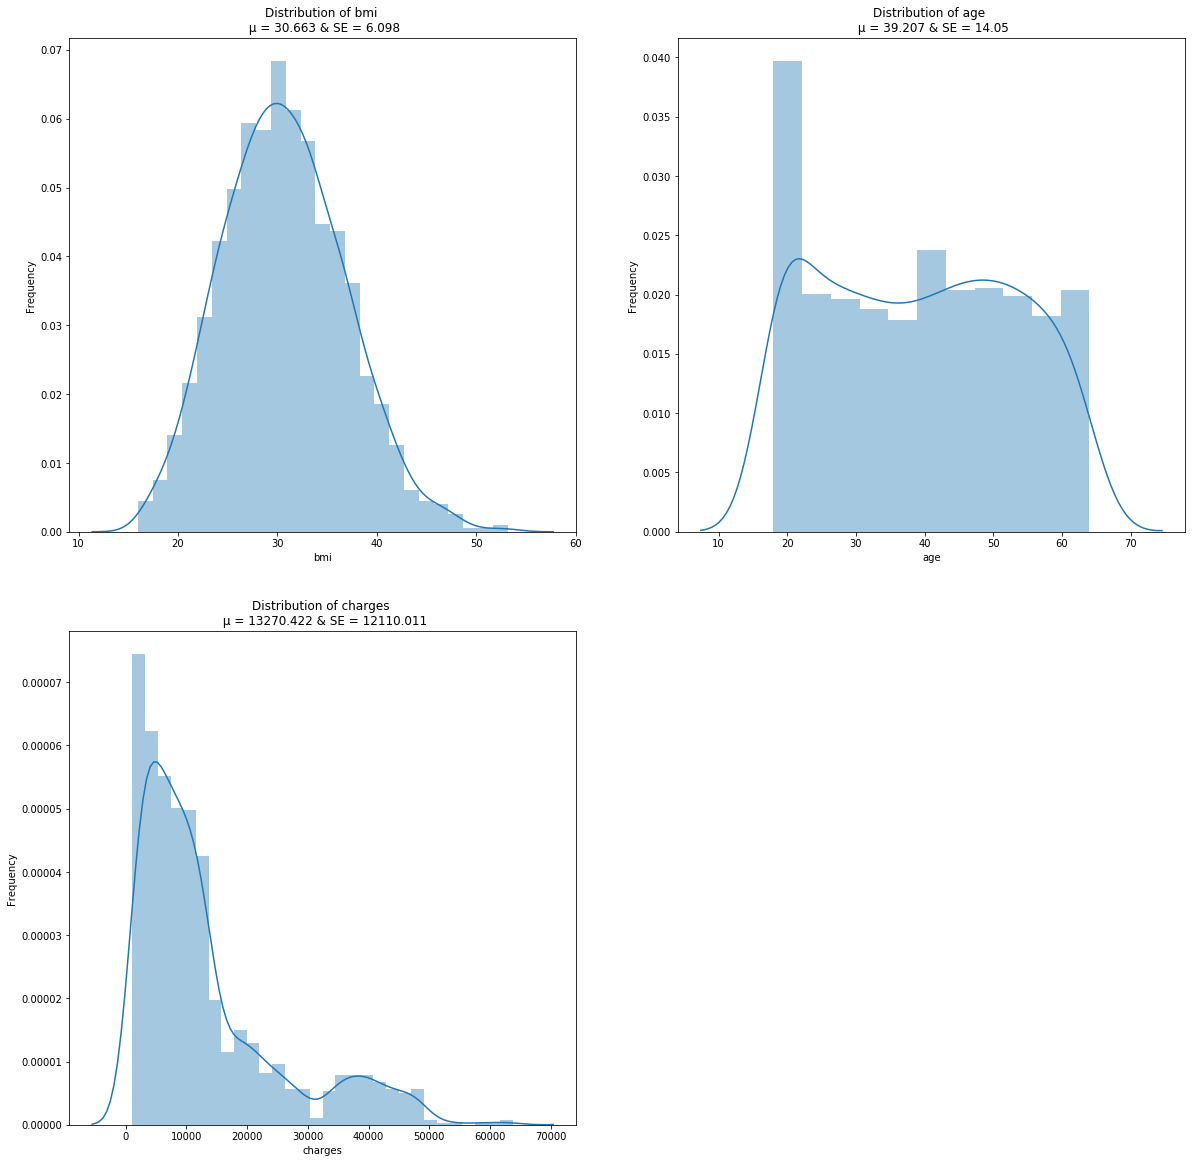

In [10]:
plt.figure(figsize= (20,20))

a=['bmi','age','charges']
i=0
while i < len(a): # looping to get distribution plot of mentioned columns
    plt.subplot(2,2,i+1)
    sns.distplot(ins_data[a[i]])
    plt.title(f'Distribution of {a[i]} \n \u03bc = {round(ins_data[a[i]].mean(), 3)} & SE = {round(ins_data[a[i]].std(),3)}')
    plt.xlabel(f'{a[i]}')
    plt.ylabel('Frequency')
    i+=1

plt.show()

<ul>
    <li>The bmi distribution looks like a normal distribution</li>
    <li>The age distribution almost looks like a bi-modal distribution with two peaks</li>
    <li>The charges distribution is a right-skewed distribution</li>
</ul>

### <b>Measure of Skewness of 'bmi', 'age' and 'charges' columns</b>

In [11]:
a=['bmi','age','charges']
i=0
while i < len(a): # looping to get skewness of mentioned columns
    print(f'The skewness value of {a[i]} is {ins_data[a[i]].skew()}')
    i+=1

The skewness value of bmi is 0.2840471105987448
The skewness value of age is 0.05567251565299186
The skewness value of charges is 1.5158796580240388


<ul>
    <li>A skewness value of 0 in the output denotes a symmetrical distribution of values.</li>
    <li>A negative skewness value in the output indicates an asymmetry in the distribution and the tail is larger towards the left hand side of the distribution.</li>
    <li>A positive skewness value in the output indicates an asymmetry in the distribution and the tail is larger towards the right hand side of the distribution as is the case here for age, bmi and charges.</li>
    <li>Skew of bmi is very less as seen in the previous step</li>
    <li>age is uniformly distributed and there's hardly any skew</li>
    <li>charges are highly skewed</li>
</ul>

### <b>Checking the presence of Outliers in 'bmi', 'age' and 'charges' columns

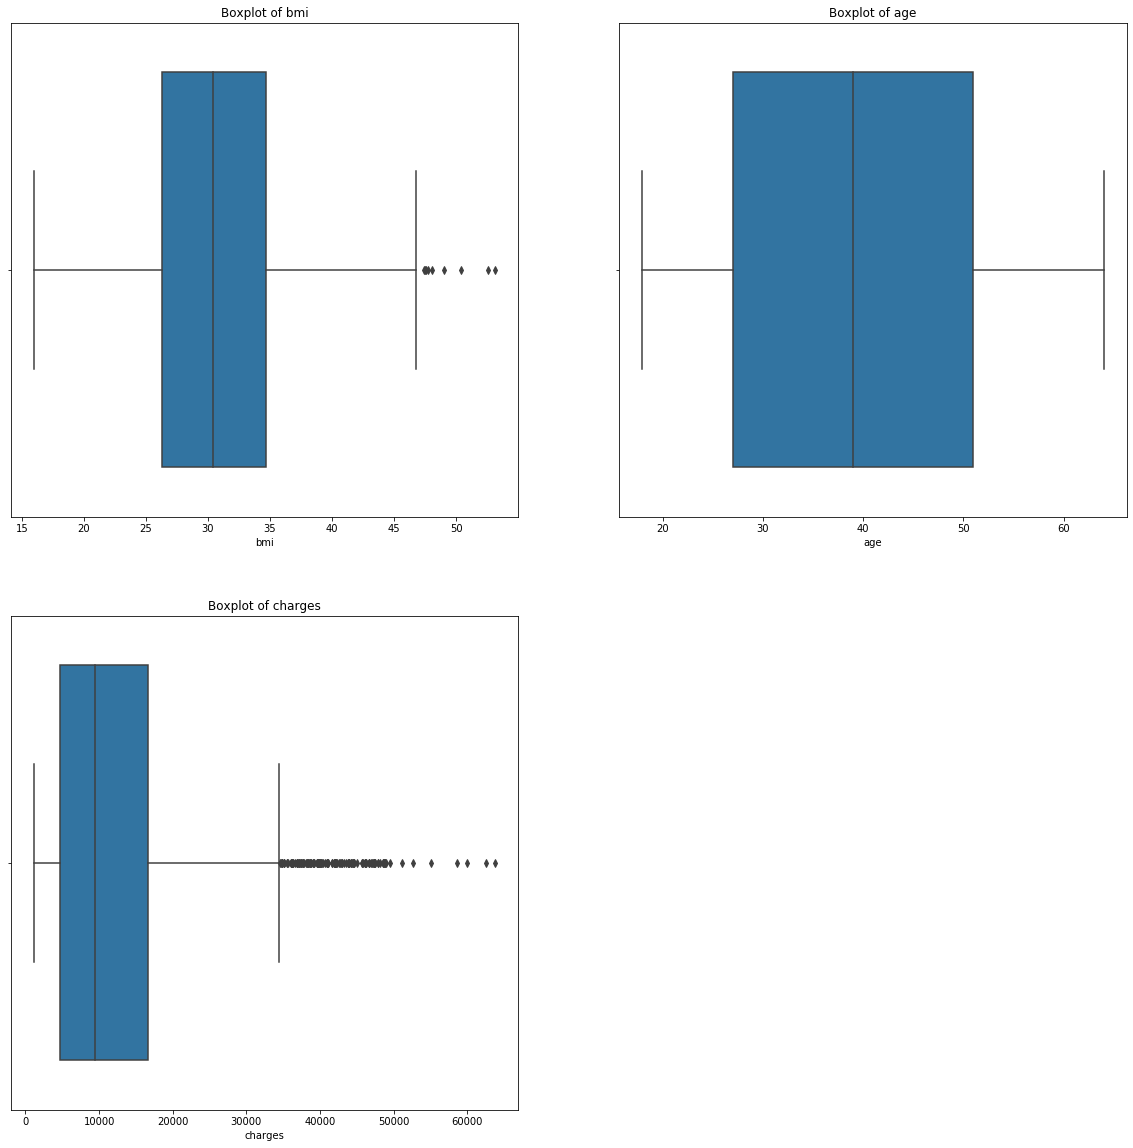

There are Outliers present in bmi column 
There are no Outliers present in age column 
There are Outliers present in charges column 



In [13]:
plt.figure(figsize= (20,20))

lower_bound = 0
upper_bound = 0
check_presence_outliers = ''
columns = ['bmi','age','charges']
i=0
while i < len(a): # get boxplots of each column
    
    # Checking through Plots
    plt.subplot(2,2,i+1)
    sns.boxplot(ins_data[columns[i]])
    plt.title(f'Boxplot of {columns[i]}')
    plt.xlabel(f'{columns[i]}')
    
    
    q1,q3 = np.percentile(ins_data[columns[i]],[25,75]) # get 1st and 3rd quartile
    iqr = q3 - q1 # get inter-quartile range
    lower_bound = q1 -(1.5 * iqr) # get lower bound
    upper_bound = q3 +(1.5 * iqr) # get outer bound
    
    # Checking through series data
    if (ins_data[columns[i]]<lower_bound).any() or (ins_data[columns[i]]>upper_bound).any() :
        check_presence_outliers += f'There are Outliers present in {columns[i]} column \n'
    else :
        check_presence_outliers += f'There are no Outliers present in {columns[i]} column \n'
    
    i+=1

plt.show()

print(check_presence_outliers)

### To check for the presence of outliers, the following steps are followed -

<ul>
    <li>Find the Inter-quartile range</li>
    <li>Set the lower bound or lower whisker of boxplot as 1st quartile minus 1.5 times of the inter-quartile range</li>
    <li>Set the upper bound or upper whisker of boxplot as 3rd quartile plus 1.5 times of the inter-quartile range</li>
    <li>Any column having values lying outside of lower bound and upper bound is said to have an outlier</li>
</ul>

### <b> Distribution of categorical columns including children column

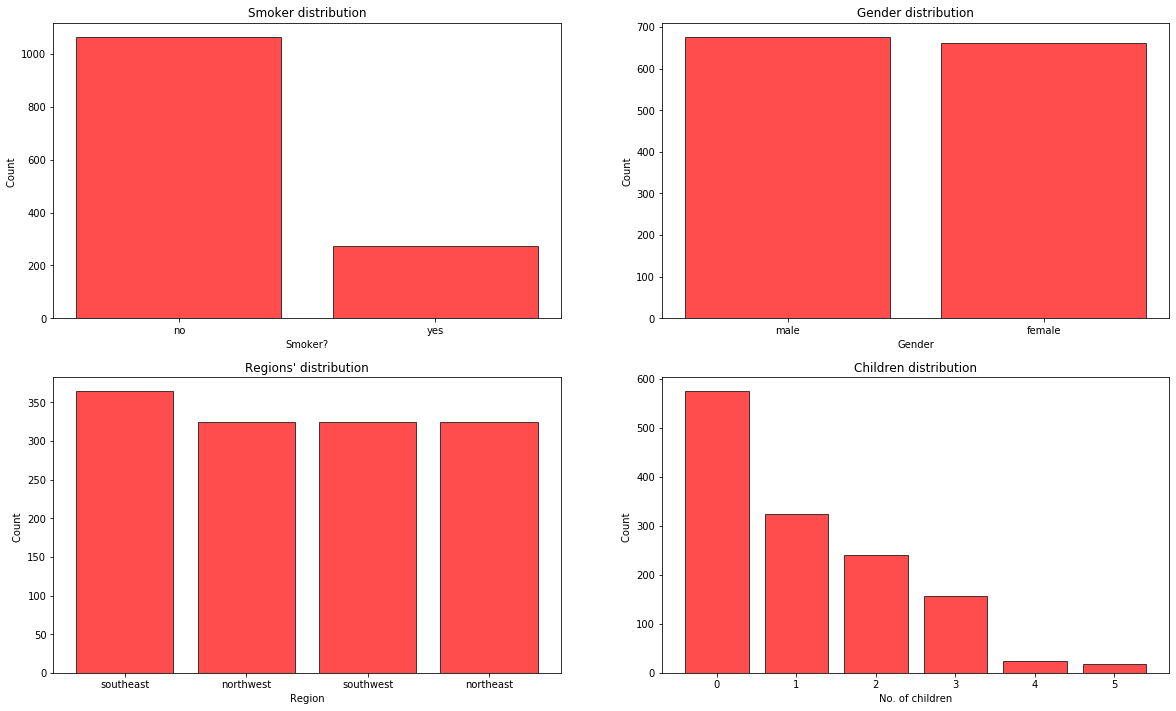

In [24]:
plt.figure(figsize=(20,25))


x = ins_data.smoker.value_counts().index    #Values for x-axis
y = [ins_data['smoker'].value_counts()[i] for i in x]   # Count of each class on y-axis

plt.subplot(4,2,1)
plt.bar(x,y, align='center',color = 'red',edgecolor = 'black',alpha = 0.7)  #plot a bar chart
plt.xlabel('Smoker?')
plt.ylabel('Count ')
plt.title('Smoker distribution')

x1 = ins_data.sex.value_counts().index    #Values for x-axis
y1 = [ins_data['sex'].value_counts()[j] for j in x1]   # Count of each class on y-axis

plt.subplot(4,2,2)
plt.bar(x1,y1, align='center',color = 'red',edgecolor = 'black',alpha = 0.7)  #plot a bar chart
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender distribution')

x2 = ins_data.region.value_counts().index    #Values for x-axis
y2 = [ins_data['region'].value_counts()[k] for k in x2]   # Count of each class on y-axis

plt.subplot(4,2,3)
plt.bar(x2,y2, align='center',color = 'red',edgecolor = 'black',alpha = 0.7)  #plot a bar chart
plt.xlabel('Region')
plt.ylabel('Count ')
plt.title("Regions' distribution")

x3 = ins_data.children.value_counts().index    #Values for x-axis
y3 = [ins_data['children'].value_counts()[l] for l in x3]   # Count of each class on y-axis

plt.subplot(4,2,4)
plt.bar(x3,y3, align='center',color = 'red',edgecolor = 'black',alpha = 0.7)  #plot a bar chart
plt.xlabel('No. of children')
plt.ylabel('Count ')
plt.title("Children distribution")

plt.show()

<ul>
    <li>There are a lot more non-smokers than there are smokers in the data</li>
    <li>Instances are distributed evenly accross all regions except the southeast region has the highest population</li>
    <li>Gender is also distributed evenly</li>
    <li>Most instances have less than 2 children and very few have 4 or 5 children Bi-variate distribution of every possible attribute pair</li>
</ul>

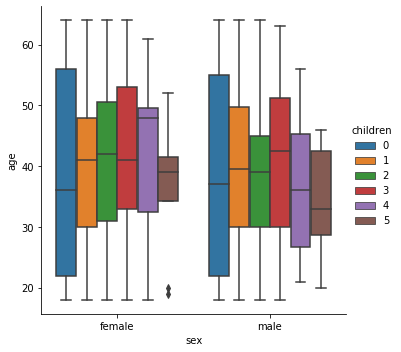

In [25]:
sns.catplot(x='sex', y='age', hue='children', kind='box', data=ins_data )

In this plot between 'sex' and 'age' with an additional variable 'children',we can see that female customers lower ages being an outlier with 5 children. The range of ages is highest among both gender customers with no children.

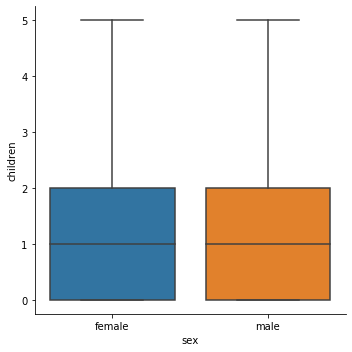

In [26]:
sns.catplot(x='sex', y='children', kind='box', data=ins_data )

In this plot between 'sex' and 'children', the 1st quartile , median , 3rd quartile and upper bound are all same for both males and females at 0,1,2 and 5 respectively.

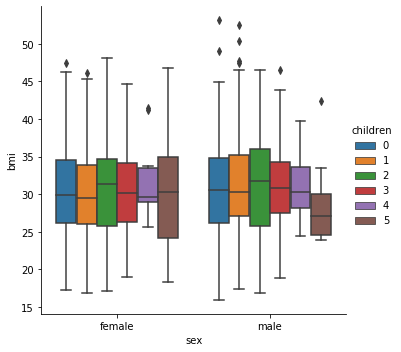

In [27]:
sns.catplot(x='sex', y='bmi', hue='children', kind='box', data=ins_data )

In this plot between 'sex' and 'bmi' with an additional variable 'children',there are some outliers here present in bmi of females having 0, 1 or 4 children. The same goes for males with 0, 1, 3 and 5 children. The shortest range of bmi of females are the ones having 4 children, highest range with 2 children. For males, the shortest range of bmi lies with having 5 children, the highest range being with 2 children.

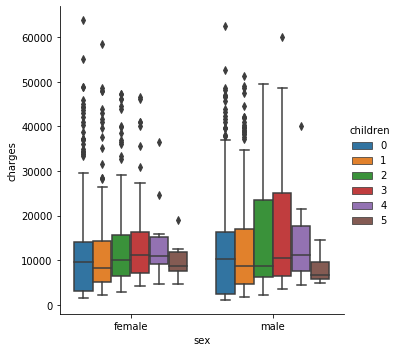

In [28]:
sns.catplot(x='sex', y='charges', hue='children', kind='box', data=ins_data )

In this plot between 'sex' and 'charges' with an additional variable 'children',there are many outliers in all categories for females, while in males outliers are absent for charges of men having 2 or 5 children. For females , the shortest range is with having 5 children and highest with no children. For males, the shortest range of charges is with having 5 children, the hoghest being with having 3 children.

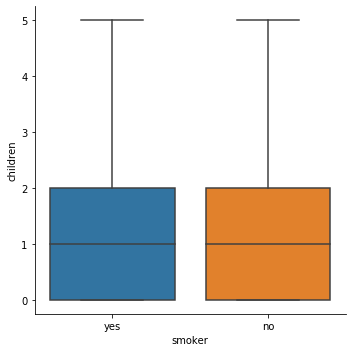

In [29]:
sns.catplot(x='smoker', y='children', kind='box', data=ins_data )

In this plot between 'smoker' and 'children', the 1st quartile , median , 3rd quartile and upper bound are all same for both males and females at 0,1,2 and 5 respectively.

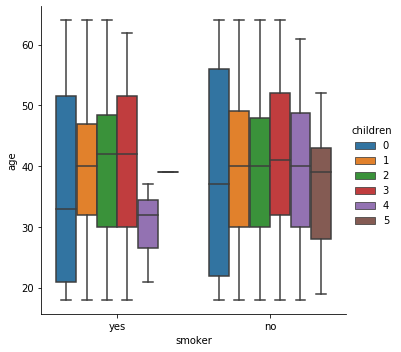

In [30]:
sns.catplot(x='smoker', y='age', hue='children', kind='box', data=ins_data )

For both smokers and non-smokers the age range is highest with those who have no children

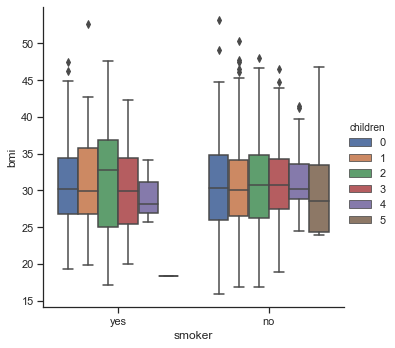

In [61]:
sns.catplot(x='smoker', y='bmi', hue='children', kind='box', data=ins_data )

Here it is quite well distributed except there are some outliers

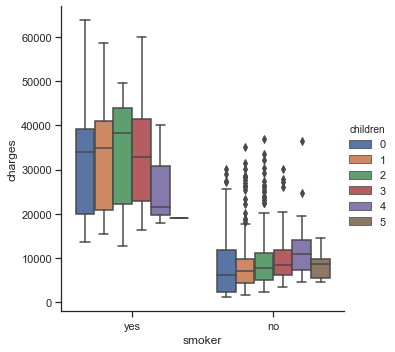

In [73]:
sns.catplot(x='smoker', y='charges', hue='children', kind='box', data=ins_data )

It is obvious here that the charges of non-smokers are significantly lower than the charges of smokers. But there quite a few exceptions in case of non-smokers. Bit smokers overall claim more money than non-smokers

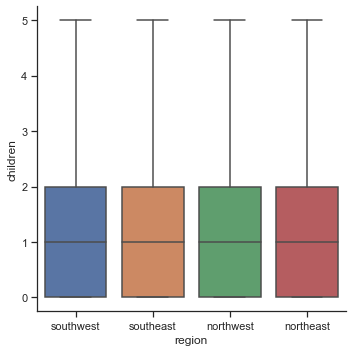

In [74]:
sns.catplot(x='region', y='children', kind='box', data=ins_data )

In this plot between 'region' and 'children', the 1st quartile , median , 3rd quartile and upper bound are all same for both males and females at 0,1,2 and 5 respectively.

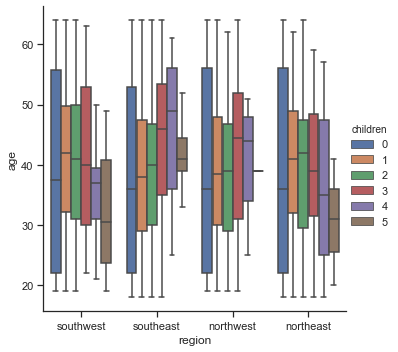

In [75]:
sns.catplot(x='region', y='age', hue='children', kind='box', data=ins_data )

People of diferent ages are well distributed across regions.

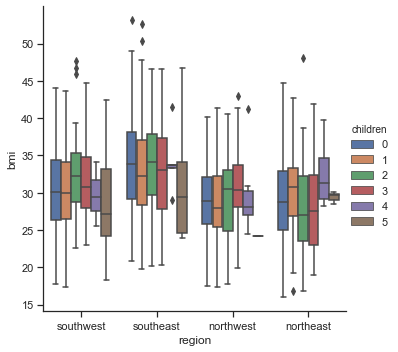

In [76]:
sns.catplot(x='region', y='bmi', hue='children', kind='box', data=ins_data )

BMI is highest across southeast regions

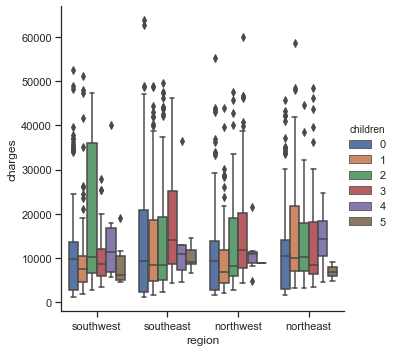

In [77]:
sns.catplot(x='region', y='charges', hue='children', kind='box', data=ins_data )

Leaving out exceptions, charges are highest in southwest region with those having two children. With exceptions, southeast region has highest charges with those having no children

### <b> Pair Plot that includes all the columns of the data frame

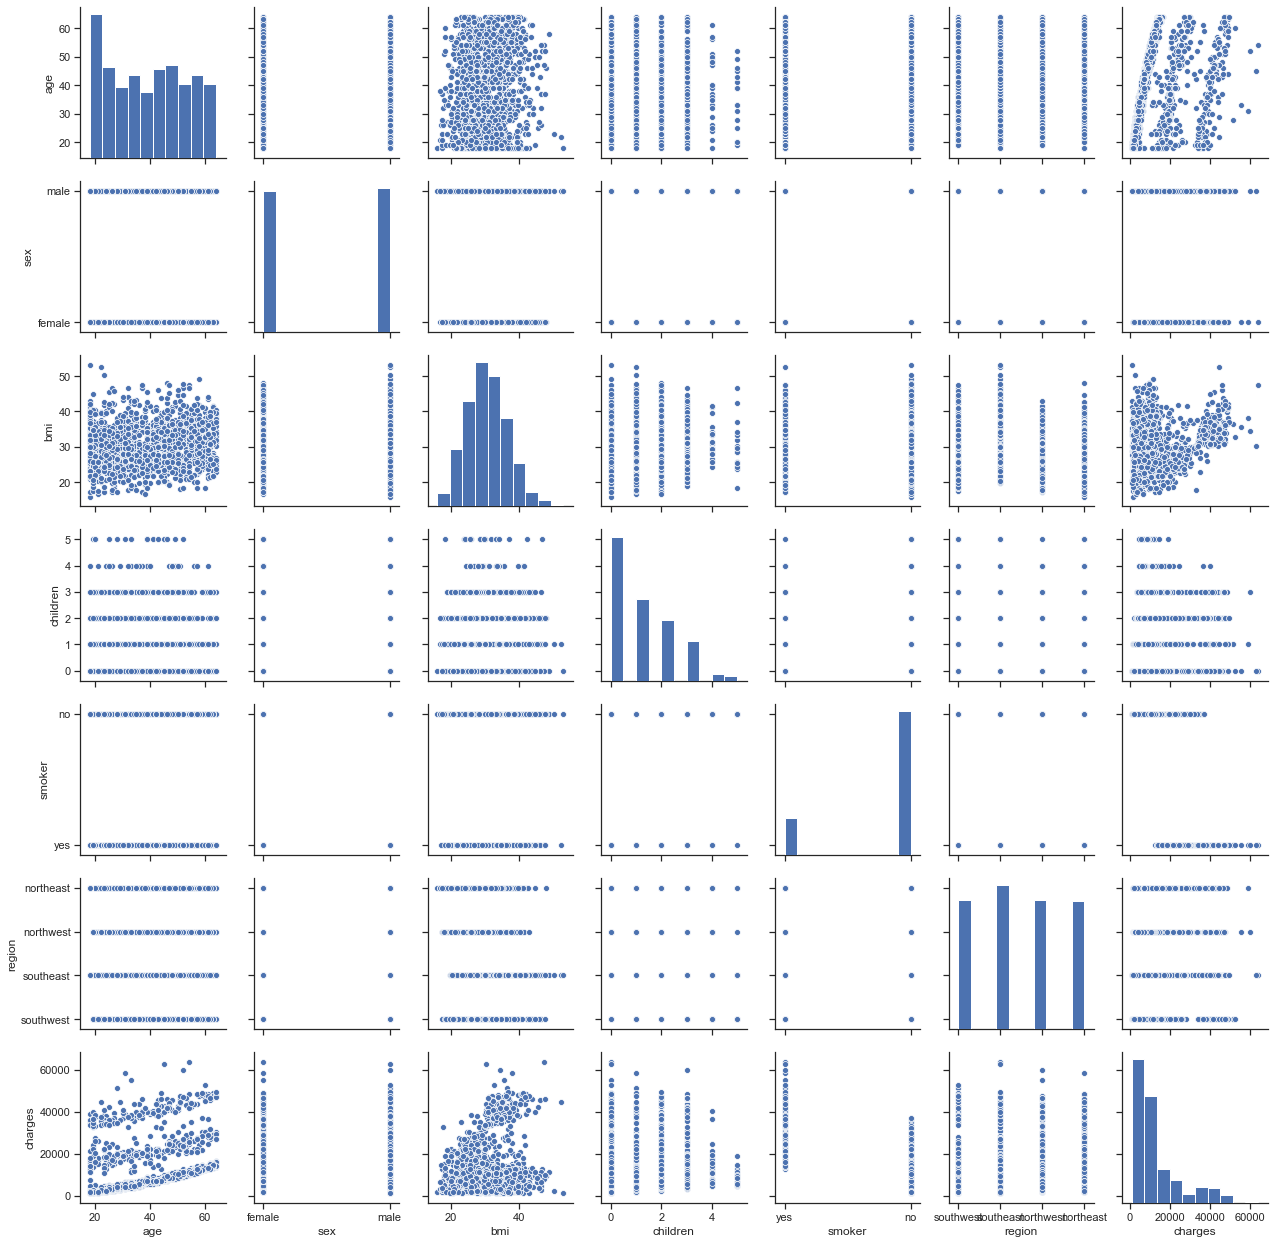

In [31]:
sns.set(style="ticks", color_codes=True)
sns.pairplot(ins_data, x_vars=ins_data.columns, y_vars=ins_data.columns) # get all columns including categorical columns as part of pair plot

### <b> Pair Plot Insights

<ul>
    <li>Although the correlation between age and charges is positive, it is very little going by how the charges are all distibuted
 across the ages and that the slope is almost parallel to the x-axis.
 Customers of different ages are distributed in all regions, sex and smoking.
 Most people across ages have none to two children and very few people across the ages have four to five children.
 The correlation between age and bmi is almost negilgible but the bmi is high for most young customers.</li>
    <li>Both sexes are well distributed in region, smoker, having children and across ages. 
 The charges of males are little higher than females towards higher charges. 
 The bmi is higher for some men</li>
    <li>The correlation is postive between bmi and charges but very low. The southest region has the highest bmi rate</li>
    <li>The charges are highest for customers with no children and lowest for 5 childrens. Children are well distributed among customers in various regions, smokers and non-smokers, and between males and females. The bmi range is shortest towards the middle for customers with 4 children.</li>
    <li>The charges of smokers are higher than non-smokers. Smoker attribute is well distributed across various other attributes.</li>
    <li>The regions are well distributed and the charges distribution across othere attributes has been captured in above insights.</li>
    <li>Coming to the histograms, most customers are around the age of 20. Males are slightly more in number than females. Most customers have Bmi around 25 to 35. Most customers have no children. Non-smokers are more in number than smokers. Most customers are from the sotheast region. Most customers have low charges.</li>
    <li>The only obvious correlation of 'charges' is with 'smoker'</li>
    <li>Looks like smokers claimed more money than non-smokers</li>
    <li>There's an interesting pattern between 'age' and 'charges. Could be because for the same ailment, older people are charged more than the younger ones</li>
</ul>

<br>
<br>
<br>
<br>

# <b> Hypothesis Testing

*  ## <b> Do charges of people who smoke differ significantly from the people who don't?

### <b> Is it one-tailed or two-tailed ?
    
It is two-tailed because we want to see if the difference of charges of smokers and non-smokers are significant or not. It does not matter whether the mean of charges of smokers is greater than or less than the mean of charges of non-smokers. We need to know whether the difference is significant i.e. based on a significance level

### <b> State the null and alternative hypothesis
    
* $H_0$: $\mu1$ = $\mu2$          => Null Hypothesis: mean of charges of smokers equals mean of charges of non-smokers
* $H_A$: $\mu1$ not equals $\mu2$ => Alternative Hypothesis: mean of charges of smokers not equals mean of charges of non-smokers 
<br>
<br>
Here we select α = 0.05 as the level of significance

### <b> Identifying the Test
    
Since we will be comparing two independent samples , we will be using t-test of independent samples

In [32]:
#Checking for missing values
ins_data.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [33]:
# Creating an array of charges of smokers 
charges_smokers = np.array(ins_data[ins_data["smoker"] == "yes"]["charges"])
# Creating an array of charges of non-smokers 
charges_non_smokers = np.array(ins_data[ins_data["smoker"] == "no"]["charges"])

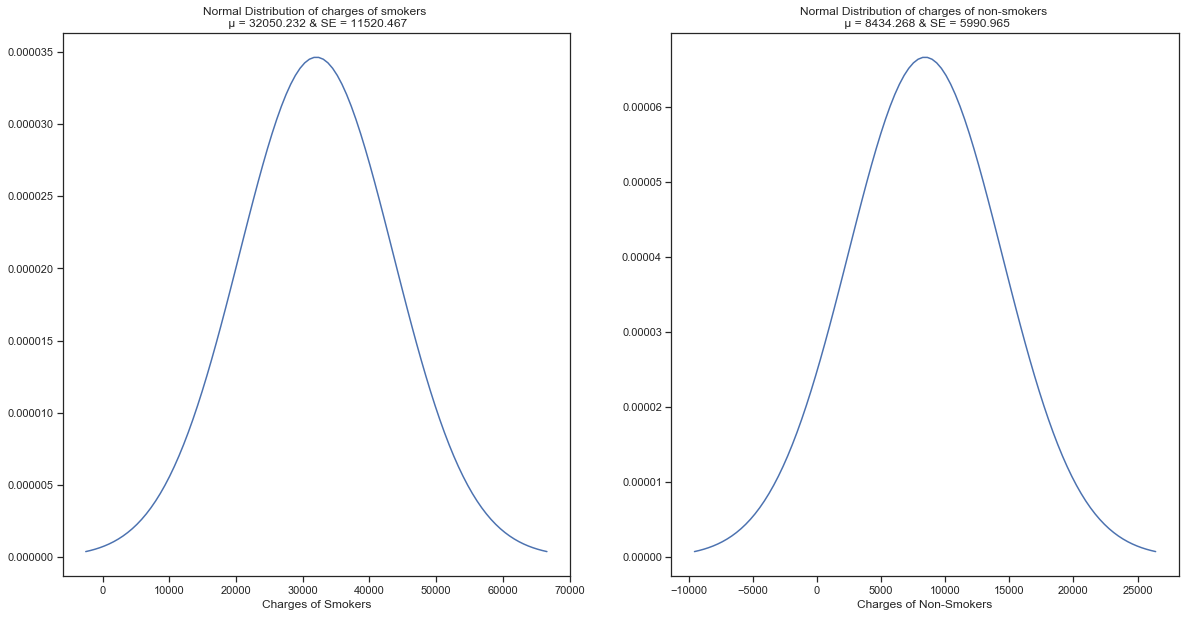

In [40]:
## Plotting normal distribution curves of the charges of smokers and non-smokers

plt.figure(figsize= (20,10))

plt.subplot(1,2,1)
#sns.distplot(charges_smokers)
mu = round(charges_smokers.mean(), 3)
variance = round(charges_smokers.var(), 3)
sigma = round(charges_smokers.std(), 3)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma))
plt.title(f'Normal Distribution of charges of smokers \n \u03bc = {round(charges_smokers.mean(), 3)} & SE = {round(charges_smokers.std(),3)}')
plt.xlabel('Charges of Smokers')

plt.subplot(1,2,2)
#sns.distplot(charges_non_smokers)
mu = round(charges_non_smokers.mean(), 3)
variance = round(charges_non_smokers.var(), 3)
sigma = round(charges_non_smokers.std(), 3)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma))
plt.title(f'Normal Distribution of charges of non-smokers \n \u03bc = {round(charges_non_smokers.mean(), 3)} & SE = {round(charges_non_smokers.std(),3)}')
plt.xlabel('Charges of Non-Smokers')

plt.show()

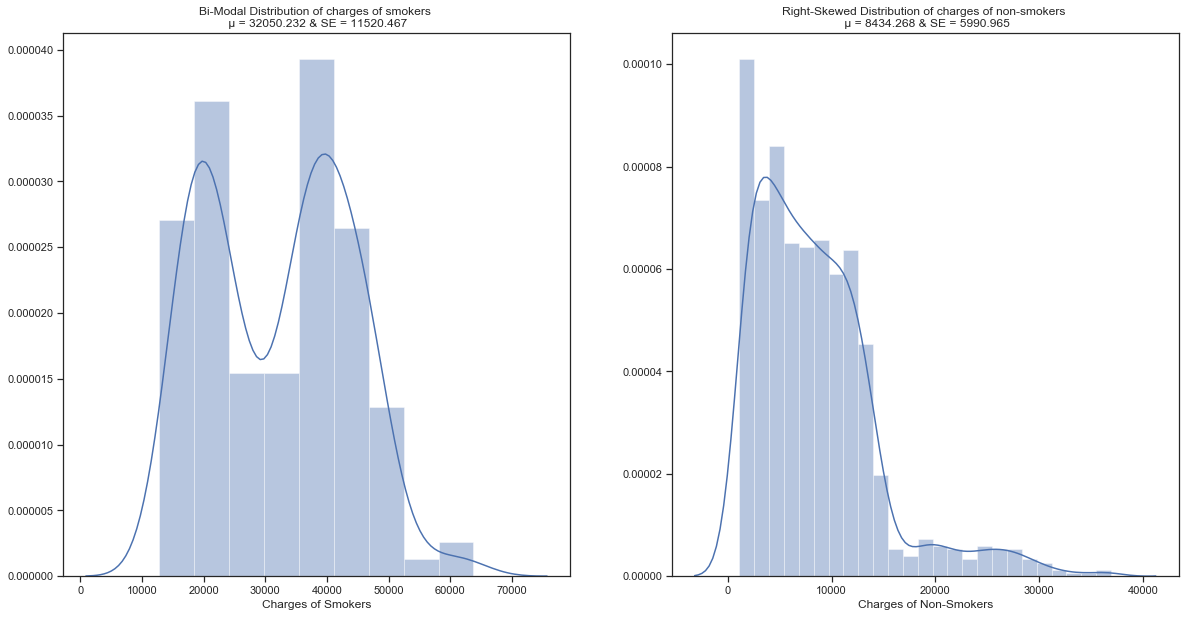

In [41]:
## Plotting distribution of charges of smokers and non-smokers

plt.figure(figsize= (20,10))

plt.subplot(1,2,1)
sns.distplot(charges_smokers)
plt.title(f'Bi-Modal Distribution of charges of smokers \n \u03bc = {round(charges_smokers.mean(), 3)} & SE = {round(charges_smokers.std(),3)}')
plt.xlabel('Charges of Smokers')

plt.subplot(1,2,2)
sns.distplot(charges_non_smokers)
plt.title(f'Right-Skewed Distribution of charges of non-smokers \n \u03bc = {round(charges_non_smokers.mean(), 3)} & SE = {round(charges_non_smokers.std(),3)}')
plt.xlabel('Charges of Non-Smokers')

plt.show()

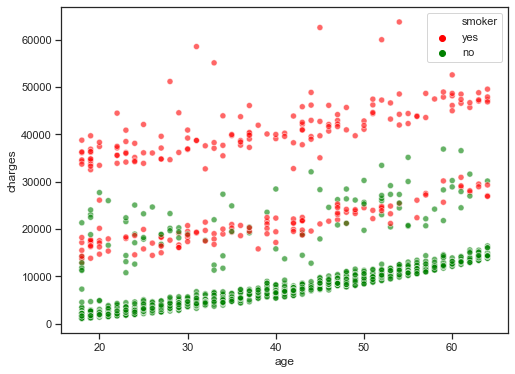

In [57]:
#Scatter plot to look for visual evidence of dependency between attributes smoker and charges accross different ages
plt.figure(figsize=(8,6))
sns.scatterplot(ins_data.age, ins_data.charges,hue=ins_data.smoker,palette= ['red','green'] ,alpha=0.6)
plt.show()

#### <b> Visually the difference between charges of smokers and charges of non-smokers is apparent

### <b> Calculate p-value

In [44]:
# two-sample independent t-test
t_statistic, p_value = ttest_ind(charges_smokers, charges_non_smokers)
print(t_statistic, p_value)

46.664921172723716 8.271435842177219e-283


### <b>Decide to reject or fail to reject null hypothesis

In this example, p value is 8.271435842177219e-283 and it is very very less than our chosen level of signifance at 5%
Since it is two tailed , the p-value on one side is less than our chosen level of signifance 2.5 % on one side.
So the statistical decision is to reject the null hypothesis at 5% level of significance.



<br>

The T-statistic here is 45.664 units of standard error of difference in variance between the mean of charges of smokers and charges of non-smokers. In this case , the difference is huge. So all the evidence is against the null hypothesis.

<br>

## So there is  sufficient evidence  to reject the null hypothesis and to say that yes there is a significant difference between charges of smokers and non-smokers. We support the alternative hypothesis.

## <b> Smokers seem to claim significantly more money than non-smokers

## <b> Charges of smoker and non-smoker are not the same

In [45]:
# p_value < 0.05 => alternative hypothesis:
# they don't have the same mean at the 5% significance level
if p_value < 0.05:
    print(f'With a p-value of {round(p_value,4)} the difference is significant. aka |We reject the null|')
else:
    print(f'With a p-value of {round(p_value,4)} the difference is not significant. aka |We fail to reject the null|')

With a p-value of 0.0 the difference is significant. aka |We reject the null|


<br>
<br>
<br>
<br>

* ## <b> Does bmi of males differ significantly from that of females?

### <b> Is it one-tailed or two-tailed ?
    
It is two-tailed because we want to see if the difference between bmi of males and females are significant or not. It does not matter whether the mean of bmi of males is greater than or less than the mean of bmi of females. We need to know whether the difference is significant i.e. based on a significance level

### <b> State the null and alternative hypothesis
    
* $H_0$: $\mu1$ = $\mu2$          => Null Hypothesis: mean of bmi of males equals mean of bmi of females
* $H_A$: $\mu1$ not equals $\mu2$ => Alternative Hypothesis: mean of bmi of males not equals mean of bmi of females 
<br>
<br>
Here we select α = 0.05 as the level of significance

### <b> Identifying the Test Statistic
    
Since we will be comparing two independent samples , we will be using t-test of independent samples

In [46]:
# Creating an array on bmi of males
males_bmi = np.array(ins_data[ins_data["sex"] == "male"]["bmi"])
# Creating an array of bmi of females
females_bmi = np.array(ins_data[ins_data["sex"] == "female"]["bmi"])

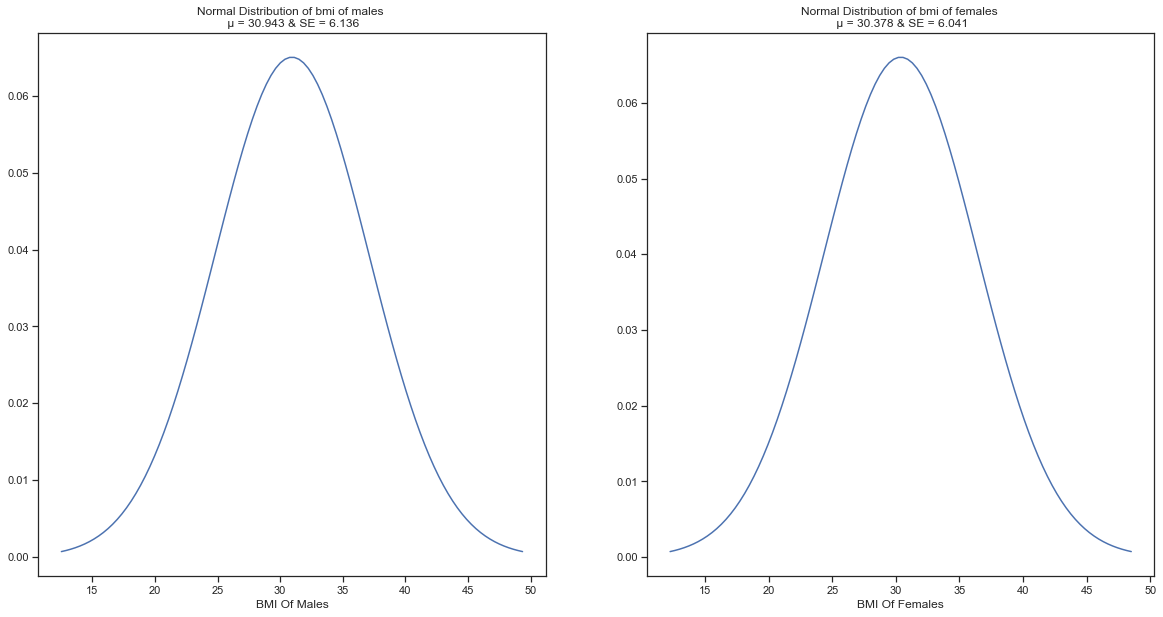

In [48]:
## Plotting normal distribution curves of the bmi of males and females

plt.figure(figsize= (20,10))

plt.subplot(1,2,1)
#sns.distplot(charges_smokers)
mu = round(males_bmi.mean(), 3)
variance = round(males_bmi.var(), 3)
sigma = round(males_bmi.std(), 3)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma))
plt.title(f'Normal Distribution of bmi of males \n \u03bc = {round(males_bmi.mean(), 3)} & SE = {round(males_bmi.std(),3)}')
plt.xlabel('BMI Of Males')

plt.subplot(1,2,2)
#sns.distplot(charges_non_smokers)
mu = round(females_bmi.mean(), 3)
variance = round(females_bmi.var(), 3)
sigma = round(females_bmi.std(), 3)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma))
plt.title(f'Normal Distribution of bmi of females \n \u03bc = {round(females_bmi.mean(), 3)} & SE = {round(females_bmi.std(),3)}')
plt.xlabel('BMI Of Females')

plt.show()

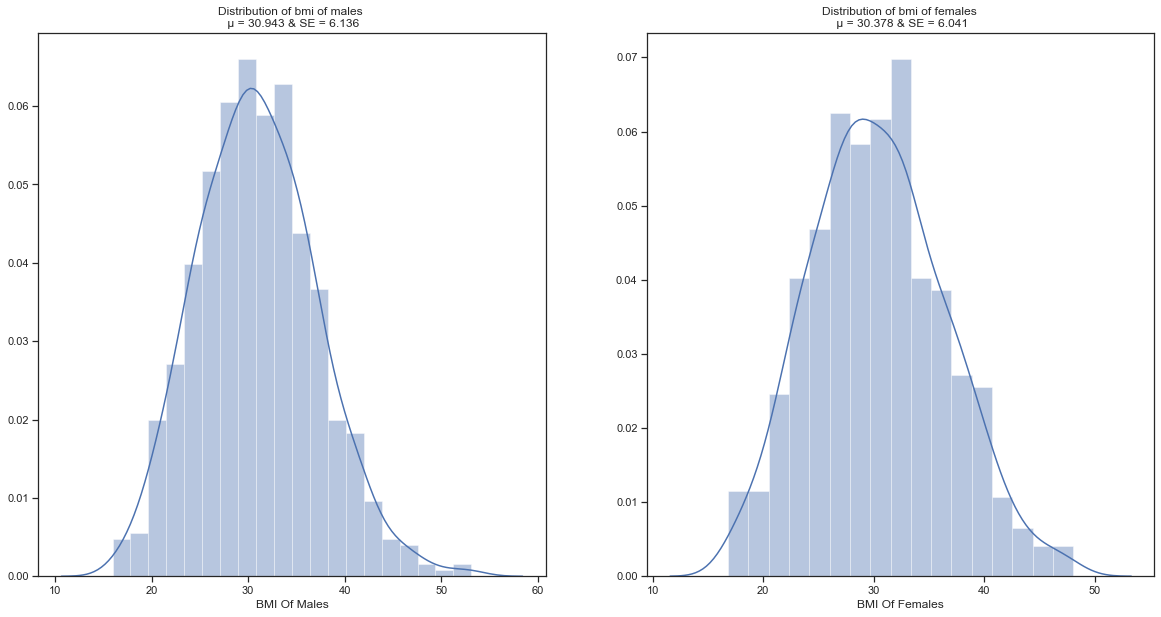

In [49]:
## Plotting distribution of charges of smokers and non-smokers

plt.figure(figsize= (20,10))

plt.subplot(1,2,1)
sns.distplot(males_bmi)
plt.title(f'Distribution of bmi of males \n \u03bc = {round(males_bmi.mean(), 3)} & SE = {round(males_bmi.std(),3)}')
plt.xlabel('BMI Of Males')

plt.subplot(1,2,2)
sns.distplot(females_bmi)
plt.title(f'Distribution of bmi of females \n \u03bc = {round(females_bmi.mean(), 3)} & SE = {round(females_bmi.std(),3)}')
plt.xlabel('BMI Of Females')

plt.show()

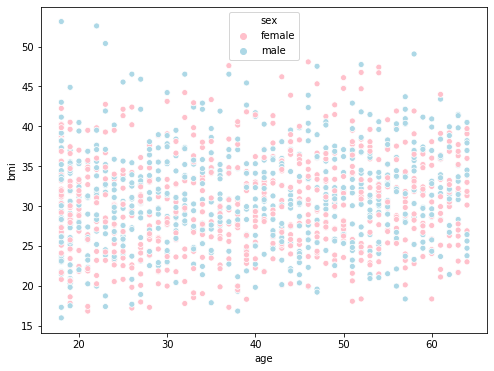

In [6]:
#Scatter plot to look for visual evidence of dependency between attributes sex and bmi accross different ages
plt.figure(figsize=(8,6))
sns.scatterplot(ins_data.age, ins_data.bmi,hue=ins_data.sex,palette= ['pink','lightblue'] )
plt.show()

#### <b> Visually, there is no apparent relation between sex and bmi

### <b> Calculate p-value

In [50]:
# performing independent t-test on two samples
t_statistic, p_value = ttest_ind(males_bmi, females_bmi)
print(t_statistic, p_value)

1.696752635752224 0.08997637178984932


### <b>Decide to reject or fail to reject null hypothesis

In this example, p value is 0.08997637178984932 and it is greater than our chosen level of signifance at 5%
Since it is two tailed , the p-value is greater than 2.5% of our chosen level of significance on one side.
So the statistical decision is to fail to reject the null hypothesis at 5% level of significance.



<br>

The T-statistic here is almost 1.7 units of standard error of difference in variance between the mean of bmi of males and bmi of females. In this case , the difference is small. So all the evidence is not enough to go against the null hypothesis.

<br>

## So there is  sufficient evidence  where we fail to reject the null hypothesis and to say thay there is NOT ENOUGH significant difference between bmi of males and females.

## <b> Gender has no effect on BMI

In [51]:
# p_value < 0.05 => alternative hypothesis:
# they don't have the same mean at the 5% significance level
if p_value < 0.05:
    print(f'With a p-value of {round(p_value,4)} the difference is significant. aka |We reject the null|')
else:
    print(f'With a p-value of {round(p_value,4)} the difference is not significant. aka |We fail to reject the null|')

With a p-value of 0.09 the difference is not significant. aka |We fail to reject the null|


<br>
<br>
<br>
<br>

* ## <b> Is the proportion of smokers significantly different in different genders?

### <b> State the null and alternative hypothesis
    
* $H_0$: p1=p2          => Null Hypothesis: The proportion of female smokers is equal to the proportion of male smokers
* $H_A$: p1 not equals p2 => Alternative Hypothesis: The proportion of female smokers is not equal to the proportion of male smokers


### <b> Identifying the Proportion Statistic
    
Since we will be comparing two proportions , we will be using z-test of proportion

In [52]:
female_smokers = ins_data[ins_data['sex'] == 'female'].smoker.value_counts()[1]  # number of female smokers
male_smokers = ins_data[ins_data['sex'] == 'male'].smoker.value_counts()[1] # number of male smokers
n_females = ins_data.sex.value_counts()[1] # number of females in the data
n_males = ins_data.sex.value_counts()[0] #number of males in the data

### <b> Plotting the proportion

In [60]:
freq = pd.crosstab(ins_data.sex,ins_data.smoker) # to the proportion of smokers among genders
freq

smoker,no,yes
sex,,
female,547,115
male,517,159


Text(0, 0.5, 'Frequency')

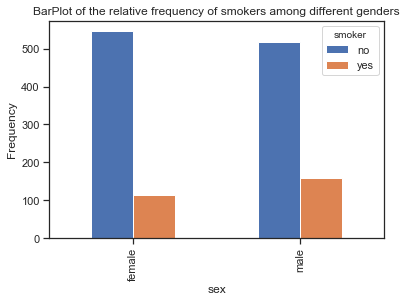

In [61]:
# Getting bar plot of the proportion of smokers and non-smokers among genders through frequency
freq.plot(kind='bar')
plt.title('BarPlot of the relative frequency of smokers among different genders')
plt.ylabel('Frequency')

In [54]:
# print the exact numbers of smokers and non-smokers in different genders
print([female_smokers, male_smokers] , [n_females, n_males]) 
# print the proportion of smokers in different genders
print(f' Proportion of smokers in females, males = {round(115/662,2)}%, {round(159/676,2)}% respectively')

[115, 159] [662, 676]
 Proportion of smokers in females, males = 0.17%, 0.24% respectively


In [62]:
# using z-test of proportions
stat, pval = proportions_ztest([female_smokers, male_smokers] , [n_females, n_males])

if pval < 0.05:
    print(f'With a p-value of {round(pval,4)} the difference is significant. aka |We reject the null|')
else:
    print(f'With a p-value of {round(pval,4)} the difference is not significant. aka |We fail to reject the null|')

With a p-value of 0.0053 the difference is significant. aka |We reject the null|


## So there is  sufficient evidence  to reject the null hypothesis and to say that YES there is significant difference between proportion of smokers in different genders.

## Males have a higher proportion

<br>
<br>
<br>
<br>

* ## <b> Is the distribution of bmi across women with no children, one child and two children, the same?

### <b> This is a case of One-way ANOVA

#### <b> Fetching the data in proper structures

In [63]:
#Dataframe for females
ins_data_females = ins_data[ins_data.sex == 'female']

In [64]:
# Creating arrays of bmi of women with no children, one child and two children
bmi_females_no_children = np.array(ins_data_females[ins_data_females.children == 0]["bmi"])
bmi_females_1_children = np.array(ins_data_females[ins_data_females.children == 1]["bmi"])
bmi_females_2_children = np.array(ins_data_females[ins_data_females.children == 2]["bmi"])

In [65]:
# Printing the count , mean and standard deviation to get an idea of the bmi data across
print('Count, Mean and standard deviation of bmi of women with no children: %3d, %3.2f and %3.2f' % (len(bmi_females_no_children ), bmi_females_no_children .mean(),np.std(bmi_females_no_children ,ddof =1)))
print('Count, Mean and standard deviation of bmi of women with one children: %3d, %3.2f and %3.2f' % (len(bmi_females_1_children), bmi_females_1_children.mean(),np.std(bmi_females_1_children,ddof =1)))
print('Count, Mean and standard deviation of bmi of women with two children: %3d, %3.2f and %3.2f' % (len(bmi_females_2_children), bmi_females_2_children.mean(),np.std(bmi_females_2_children,ddof =1)))

Count, Mean and standard deviation of bmi of women with no children: 289, 30.36 and 5.97
Count, Mean and standard deviation of bmi of women with one children: 158, 30.05 and 5.79
Count, Mean and standard deviation of bmi of women with two children: 119, 30.65 and 6.63


In [66]:
# Creating a dataframe to get the bmi alongside appropriate category of women with children

mean_bmi_df = pd.DataFrame()

#F0 represents women with no children
df1            = pd.DataFrame({'Women_Children': 'F0', 'Mean_BMI':bmi_females_no_children})
#F1 represents women with one child
df2            = pd.DataFrame({'Women_Children': 'F1', 'Mean_BMI':bmi_females_1_children})
#F2 represents women with two children
df3            = pd.DataFrame({'Women_Children': 'F2', 'Mean_BMI':bmi_females_2_children})

mean_bmi_df = mean_bmi_df.append(df1) 
mean_bmi_df = mean_bmi_df.append(df2) 
mean_bmi_df = mean_bmi_df.append(df3) 

### <b> Exploring the data graphically

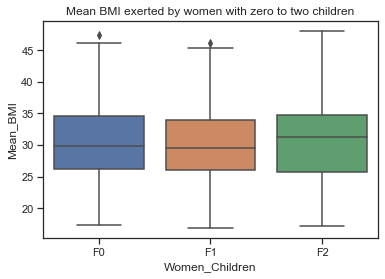

In [67]:
# to see the distribution of data across different categories
sns.boxplot(x = "Women_Children", y = "Mean_BMI", data = mean_bmi_df)
plt.title('Mean BMI exerted by women with zero to two children')
plt.show()

#### The boxplots show almost similar shapes, location and spreads and there are outliers with women having no or one children. The median bmi of women having two children is slightly higher than the other two categories.

### State the null and alternative hypothesis:

* $H_0$: $\mu1$ = $\mu2$ = $\mu3$
* $H_A$: At least one $\mu$ differs 

Here $\mu1$, $\mu2$ and $\mu3$ are the mean bmi of women with no children, one child and two children respectively.

### Decide the significance level

Here we select α = 0.05

### Identify the test

Here we have three groups. Analysis of variance can determine whether the means of three or more groups are different. ANOVA uses F-tests to statistically test the equality of means.

### Calculate p value using ANOVA table

In [68]:
# working on ordinary least squares decomposition to map mean bmi to women-children category
mod = ols('Mean_BMI ~ Women_Children', data = mean_bmi_df).fit() 
# performing one-way anova on above data for type 2 anova dataframe
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

                      sum_sq     df         F    PR(>F)
Women_Children     24.590123    2.0  0.334472  0.715858
Residual        20695.661583  563.0       NaN       NaN


In [72]:
if aov_table.iloc[0,3] < 0.05: # to get p-value
    print('We reject the null')
else:
    print('We fail to reject the null')

We fail to reject the null


## So there is  sufficient evidence  where we fail to reject the null hypothesis and to say that the distribution of bmi across women with no children, one child and two children are almost the same. No significant difference.

## <b> BMI is not changed by the number of children a women has as long as the number of children are zero, one and two